In [1]:
import Pkg
include("../folder_path.jl")
import Pkg
Pkg.activate(project_folder)

  Activating project at `~/Projects/AAV2`


In [2]:
using JLD2, PyPlot, BioSeqInt, Flux, StringDistances

In [3]:
include(project_folder*"analysis/utils.jl")

auc (generic function with 1 method)

# Data

In [4]:
file1 = load(project_folder*"my_data/data_experiment1.jld2")
wt_aa = file1["wt_aa"]
seqs1 = file1["sequences_experiment1"];

In [5]:
file2 = load(project_folder*"my_data/data_experiment2.jld2")
seqs2 = file2["sequences_experiment2"];

In [6]:
file3 = load(project_folder*"my_data/data_experiment3.jld2")
seqs3 = file3["sequences_experiment3"];

In [7]:
dist1 = map(x -> evaluate(Levenshtein(), x, wt_aa), seqs1)
dist2 = map(x -> evaluate(Levenshtein(), x, wt_aa), seqs2)
dist3 = map(x -> evaluate(Levenshtein(), x, wt_aa), seqs3);

In [8]:
distvals1 = sort(unique(dist1));

In [9]:
distvals2 = sort(unique(dist2));

In [10]:
distvals3 = sort(unique(dist3));

In [11]:
distcounts1 = map(x->count(dist1 .== x), distvals1)
distcounts2 = map(x->count(dist2 .== x), distvals2)
distcounts3 = map(x->count(dist3 .== x), distvals3);

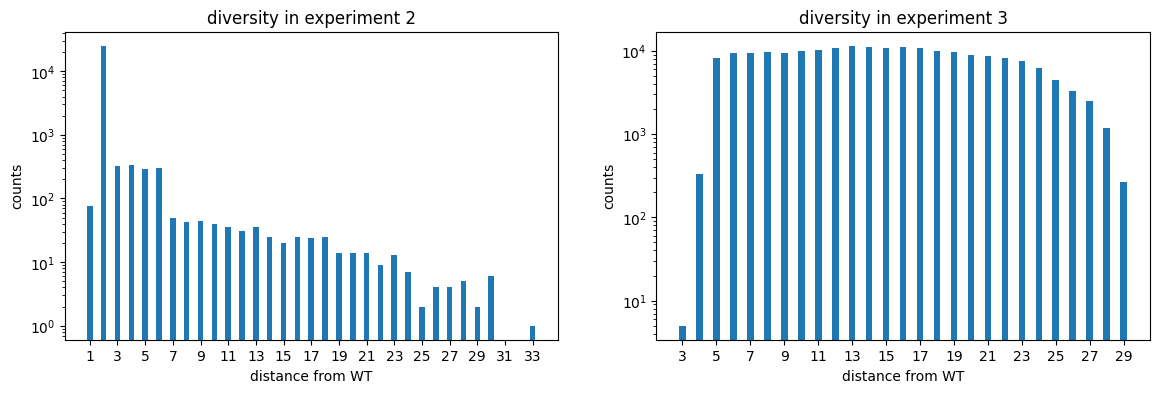

In [12]:
fig, ax = subplots(1,2, figsize=(14,4))

#ax[1].bar(distvals1, distcounts1, width=0.1)
#ax[1].set_xlabel("distance from WT")
#ax[1].set_ylabel("counts")
#ax[1].set_title("diversity in experiment 1")
#ax[1].set_xticks(0:1)

ax[1].bar(distvals2, distcounts2, width=0.4)
ax[1].set_xlabel("distance from WT")
ax[1].set_ylabel("counts")
ax[1].set_title("diversity in experiment 2")
ax[1].set_xticks(distvals2 |> x-> extrema(x) |> x->x[1]:2:x[2])
ax[1].set_yscale(:log)

ax[2].bar(distvals3, distcounts3, width=0.4)
ax[2].set_xlabel("distance from WT")
ax[2].set_ylabel("counts")
ax[2].set_title("diversity in experiment 3")
ax[2].set_xticks(distvals3 |> x-> extrema(x) |> x->x[1]:2:x[2])
ax[2].set_yscale(:log);

In [13]:
lengthvals1 = unique(length.(seqs1))
lengthcounts1 = map(x->count(x .== length.(seqs1)), lengthvals1)
lengthvals2 = unique(length.(seqs2))
lengthcounts2 = map(x->count(x .== length.(seqs2)), lengthvals2)
lengthvals3 = unique(length.(seqs3))
lengthcounts3 = map(x->count(x .== length.(seqs3)), lengthvals3)

16-element Vector{Int64}:
 19709
 16855
 18491
 20407
 18011
 20446
 18654
 17808
 11195
  3334
 14902
 10567
  6542
  4185
  1823
   706

In [14]:
lengthcounts1

2-element Vector{Int64}:
 533
 552

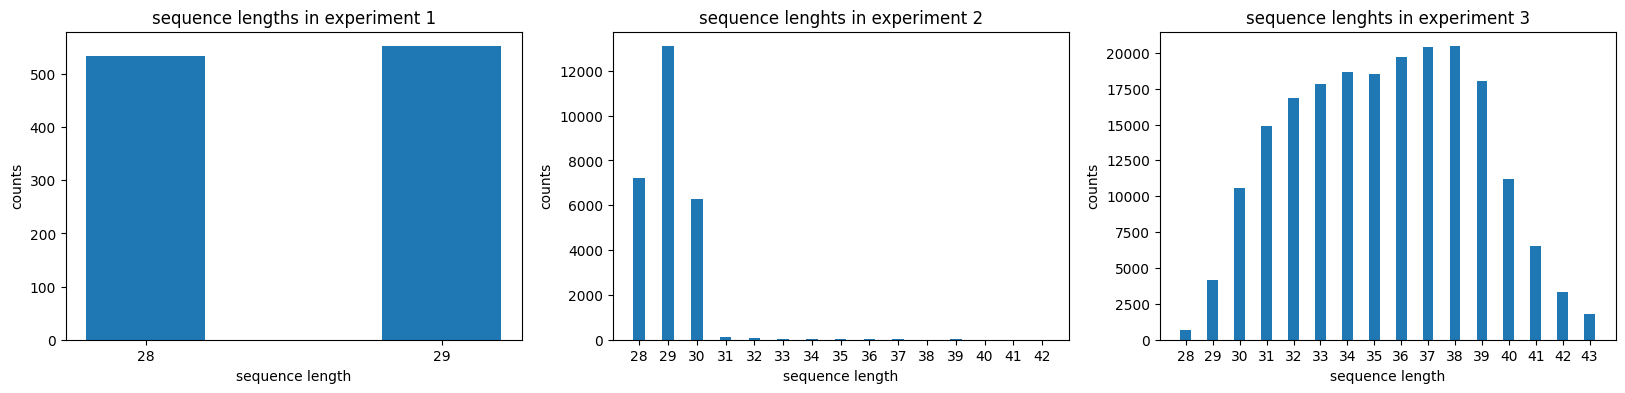

16-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.axis.XTick object at 0x7fa1f6f5f1f0>
 PyObject <matplotlib.axis.XTick object at 0x7fa1f6f5f1c0>
 PyObject <matplotlib.axis.XTick object at 0x7fa1f6f4aeb0>
 PyObject <matplotlib.axis.XTick object at 0x7fa1f6e6ab50>
 PyObject <matplotlib.axis.XTick object at 0x7fa1f6e6ad60>
 PyObject <matplotlib.axis.XTick object at 0x7fa1f6e76640>
 PyObject <matplotlib.axis.XTick object at 0x7fa1f6e76d90>
 PyObject <matplotlib.axis.XTick object at 0x7fa1f6e7b520>
 PyObject <matplotlib.axis.XTick object at 0x7fa1f6e7bc70>
 PyObject <matplotlib.axis.XTick object at 0x7fa1f6e83400>
 PyObject <matplotlib.axis.XTick object at 0x7fa1f6e83b50>
 PyObject <matplotlib.axis.XTick object at 0x7fa1f6e7b460>
 PyObject <matplotlib.axis.XTick object at 0x7fa1f6e6a700>
 PyObject <matplotlib.axis.XTick object at 0x7fa1f6e8d160>
 PyObject <matplotlib.axis.XTick object at 0x7fa1f6e8d7f0>
 PyObject <matplotlib.axis.XTick object at 0x7fa1f6e8df40>

In [15]:
fig, ax = subplots(1,3, figsize=(20,4))

ax[1].bar(lengthvals1, lengthcounts1, width=0.4)
ax[1].set_xlabel("sequence length")
ax[1].set_ylabel("counts")
ax[1].set_title("sequence lengths in experiment 1")
ax[1].set_xticks(lengthvals1 |> x-> extrema(x) |> x->x[1]:1:x[2])

ax[2].bar(lengthvals2, lengthcounts2, width=0.4)
ax[2].set_xlabel("sequence length")
ax[2].set_ylabel("counts")
ax[2].set_title("sequence lenghts in experiment 2")
ax[2].set_xticks(lengthvals2 |> x-> extrema(x) |> x->x[1]:1:x[2])


ax[3].bar(lengthvals3, lengthcounts3, width=0.4)
ax[3].set_xlabel("sequence length")
ax[3].set_ylabel("counts")
ax[3].set_title("sequence lenghts in experiment 3")
ax[3].set_xticks(lengthvals3 |> x-> extrema(x) |> x->x[1]:1:x[2])

#ax .|> x -> x.set_yscale(:log)

In [ ]:
counts = Dict(1=>file1["counts_experiment1"], 2=>file2["counts_experiment2"], 3=>file3["counts_experiment3"])

In [ ]:
dist = Dict(1=>dist1, 2=> dist2, 3=>dist3)

In [ ]:
function weighted_avg_err(x, weights; corrected = false)
    avg_x = sum(x.* weights, dims=1) ./ sum(weights, dims=1)
    err_x = zeros(length(avg_x))
    
    for t in eachindex(err_x)
            err_x[t] = sqrt(inv(sum(weights[:,t])-1.0)*sum(((x.-avg_x[t]).^2).*weights[:,t]))
        end
    
    if corrected 
        for t in eachindex(err_x)
            err_x[t] /= sqrt(sum(weights[:,t]))
        end
    end
                
    return avg_x, err_x
end

In [ ]:
for i in 1:3
    println("EXPERIMENT $i")
    println("n variants: ", size(counts[i], 1))
    println("depth: ", sum(counts[i], dims=1))
    println("coverage: ", sum(counts[i], dims=1) ./ size(counts[i], 1))
    println("diversty: ", weighted_avg_err(dist[i], counts[i]; corrected = false))
end